# Binary Classification Problem

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [82]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')


In [83]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242


In [84]:
test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [85]:
print(train.shape)
print(test.shape)

(6500, 10)
(3500, 9)


In [86]:
train.columns

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Team_Value', 'Playing_Style',
       'Average_Player_Age', 'Number_Of_Injured_Players',
       'Coach_Experience_Level', 'ID'],
      dtype='object')

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
Won_Championship                     6500 non-null int64
Previous_SB_Wins                     6500 non-null int64
Number_Of_Wins_This_Season           6500 non-null int64
Number_Of_First_Round_Draft_Picks    6500 non-null int64
Team_Value                           6500 non-null object
Playing_Style                        6500 non-null object
Average_Player_Age                   6500 non-null int64
Number_Of_Injured_Players            6500 non-null object
Coach_Experience_Level               6500 non-null object
ID                                   6500 non-null int64
dtypes: int64(6), object(4)
memory usage: 507.9+ KB


In [88]:
train.describe()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,ID
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,0.500769,1.829077,13.926308,2.154615,26.346615,4983.140000
std,0.500038,0.582494,1.135781,0.598970,0.573036,2882.454419
min,0.000000,0.000000,10.000000,0.000000,24.000000,2.000000
25%,0.000000,1.000000,13.000000,2.000000,26.000000,2472.500000
50%,1.000000,2.000000,14.000000,2.000000,26.000000,4952.500000
75%,1.000000,2.000000,15.000000,3.000000,27.000000,7469.500000
max,1.000000,4.000000,18.000000,4.000000,28.000000,9999.000000


In [89]:
train = train.drop('ID',axis=1)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 9 columns):
Won_Championship                     6500 non-null int64
Previous_SB_Wins                     6500 non-null int64
Number_Of_Wins_This_Season           6500 non-null int64
Number_Of_First_Round_Draft_Picks    6500 non-null int64
Team_Value                           6500 non-null object
Playing_Style                        6500 non-null object
Average_Player_Age                   6500 non-null int64
Number_Of_Injured_Players            6500 non-null object
Coach_Experience_Level               6500 non-null object
dtypes: int64(5), object(4)
memory usage: 457.1+ KB


In [91]:
train.columns

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Team_Value', 'Playing_Style',
       'Average_Player_Age', 'Number_Of_Injured_Players',
       'Coach_Experience_Level'],
      dtype='object')

In [92]:
train['Previous_SB_Wins'].value_counts()

2    4189
1    1677
3     606
0      24
4       4
Name: Previous_SB_Wins, dtype: int64

In [93]:
train['Number_Of_Wins_This_Season'].value_counts() 

14    2269
13    1636
15    1481
12     542
16     421
11      82
17      56
10       7
18       6
Name: Number_Of_Wins_This_Season, dtype: int64

In [94]:
train['Number_Of_First_Round_Draft_Picks'].value_counts()

2    4118
3    1653
1     694
4      29
0       6
Name: Number_Of_First_Round_Draft_Picks, dtype: int64

In [95]:
train['Team_Value'].value_counts()

Less_Than_Four_Billion     5130
Above_Four_Billion          717
Less_Than_Three_Billion     653
Name: Team_Value, dtype: int64

In [96]:
train['Playing_Style'].value_counts()

Aggressive_Defense    3204
Balanced              2908
Aggressive_Offense     223
Relaxed                165
Name: Playing_Style, dtype: int64

In [97]:
train['Average_Player_Age'].value_counts()

26    3786
27    2385
25     262
28      66
24       1
Name: Average_Player_Age, dtype: int64

In [98]:
train['Number_Of_Injured_Players'].value_counts()

five     1894
six      1799
four     1069
seven     972
three     343
eight     289
two        78
nine       44
one        10
ten         2
Name: Number_Of_Injured_Players, dtype: int64

In [99]:
train['Number_Of_Injured_Players'] = train['Number_Of_Injured_Players'].map({'one':0,'two':1,'three':2,'four':3,'five':4,'six':5,
                                                                           'seven':6,'eight':7,'nine':8,'ten':9})

In [100]:
train.columns

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Team_Value', 'Playing_Style',
       'Average_Player_Age', 'Number_Of_Injured_Players',
       'Coach_Experience_Level'],
      dtype='object')

In [101]:
train['Coach_Experience_Level'].value_counts()

Intermediate    5154
Beginner         674
Advanced         672
Name: Coach_Experience_Level, dtype: int64

In [102]:
train['Won_Championship'].value_counts()

1    3255
0    3245
Name: Won_Championship, dtype: int64

### Feature Selection

In [103]:
train.isna().sum()

Won_Championship                     0
Previous_SB_Wins                     0
Number_Of_Wins_This_Season           0
Number_Of_First_Round_Draft_Picks    0
Team_Value                           0
Playing_Style                        0
Average_Player_Age                   0
Number_Of_Injured_Players            0
Coach_Experience_Level               0
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

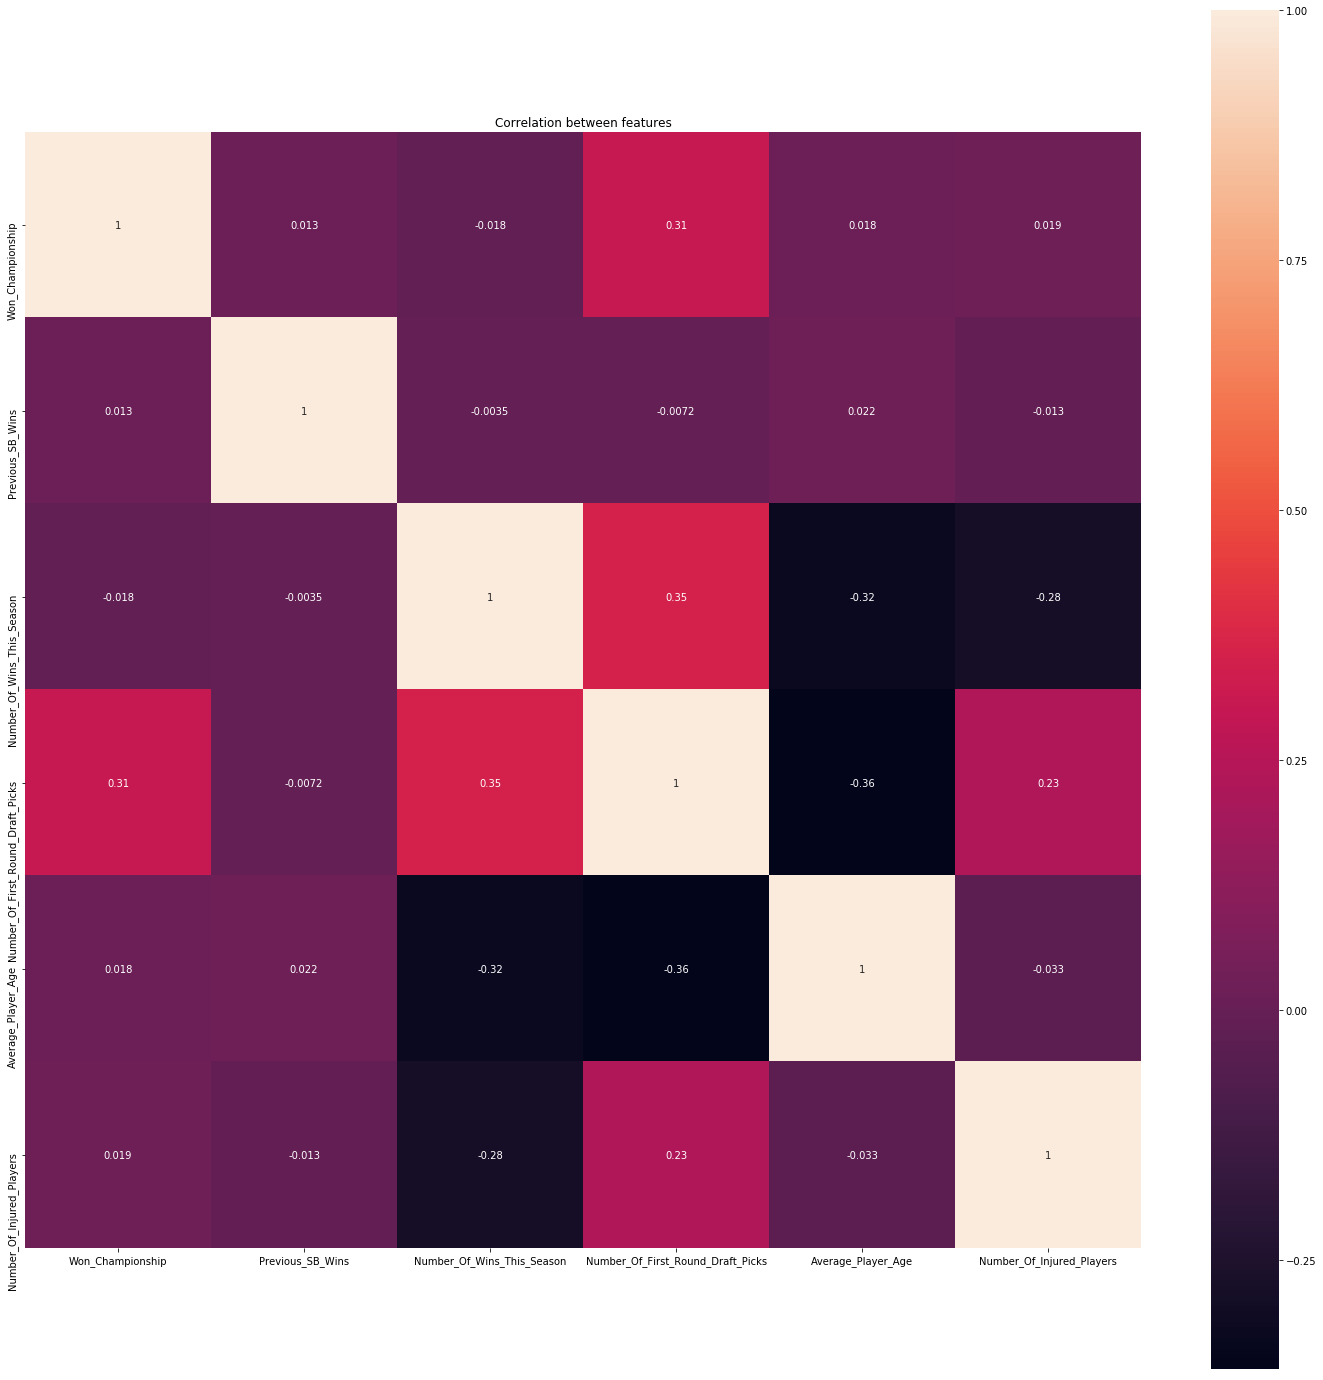

In [104]:
plt.figure(figsize=(25,25))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

### No correlation among numerical features : Previous_SB_Wins, Number_Of_Wins_This_Season, Number_Of_First_Round_Draft_Picks, Average_Player_Age, Number_Of_Injured_Players

#### Now just check Effect/Affect of all features on Target 

#### Categorical Feature_list = ['Team_Value', 'Playing_Style','Coach_Experience_Level']
#### Numerical Feature_list = ['Previous_SB_Wins', 'Number_Of_Wins_This_Season', 'Number_Of_First_Round_Draft_Picks', 'Average_Palyer_Age','Number_Of_Injured_Palyers']
#### Target = ['Won_Championship']

In [107]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,4,Intermediate
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,4,Intermediate
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,3,Intermediate
3,0,2,12,2,Above_Four_Billion,Balanced,27,5,Intermediate
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,4,Intermediate


In [108]:
train = pd.get_dummies(train)

In [109]:
train.shape

(6500, 16)

In [110]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Number_Of_Injured_Players,Team_Value_Above_Four_Billion,Team_Value_Less_Than_Four_Billion,Team_Value_Less_Than_Three_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Aggressive_Offense,Playing_Style_Balanced,Playing_Style_Relaxed,Coach_Experience_Level_Advanced,Coach_Experience_Level_Beginner,Coach_Experience_Level_Intermediate
0,0,3,13,2,27,4,0,1,0,0,0,1,0,0,0,1
1,0,2,14,2,26,4,0,1,0,0,1,0,0,0,0,1
2,1,2,13,1,27,3,0,1,0,1,0,0,0,0,0,1
3,0,2,12,2,27,5,1,0,0,0,0,1,0,0,0,1
4,0,1,15,2,26,4,0,1,0,0,0,1,0,0,0,1


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [112]:
train.columns

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Average_Player_Age',
       'Number_Of_Injured_Players', 'Team_Value_Above_Four_Billion',
       'Team_Value_Less_Than_Four_Billion',
       'Team_Value_Less_Than_Three_Billion',
       'Playing_Style_Aggressive_Defense', 'Playing_Style_Aggressive_Offense',
       'Playing_Style_Balanced', 'Playing_Style_Relaxed',
       'Coach_Experience_Level_Advanced', 'Coach_Experience_Level_Beginner',
       'Coach_Experience_Level_Intermediate'],
      dtype='object')

In [114]:
col_list = list(columns)

In [115]:
col_list_x = list(set(col_list) - set('Won_Championship'))
col_list_x

['Team_Value_Less_Than_Four_Billion',
 'Previous_SB_Wins',
 'Playing_Style_Balanced',
 'Team_Value_Less_Than_Three_Billion',
 'Playing_Style_Relaxed',
 'Team_Value_Above_Four_Billion',
 'Playing_Style_Aggressive_Defense',
 'Playing_Style_Aggressive_Offense',
 'Number_Of_First_Round_Draft_Picks',
 'Number_Of_Wins_This_Season',
 'Number_Of_Injured_Players',
 'Coach_Experience_Level_Intermediate',
 'Coach_Experience_Level_Beginner',
 'Coach_Experience_Level_Advanced',
 'Average_Player_Age']

In [116]:
col_list_y = ['Won_Championship']
col_list_y

['Won_Championship']

In [117]:
x = train[col_list_x]
y = train['Won_Championship']

In [118]:
x.head()

,Team_Value_Less_Than_Four_Billion,Previous_SB_Wins,Playing_Style_Balanced,Team_Value_Less_Than_Three_Billion,Playing_Style_Relaxed,Team_Value_Above_Four_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Aggressive_Offense,Number_Of_First_Round_Draft_Picks,Number_Of_Wins_This_Season,Number_Of_Injured_Players,Coach_Experience_Level_Intermediate,Coach_Experience_Level_Beginner,Coach_Experience_Level_Advanced,Average_Player_Age
0,1,3,1,0,0,0,0,0,2,13,4,1,0,0,27
1,1,2,0,0,0,0,0,1,2,14,4,1,0,0,26
2,1,2,0,0,0,0,1,0,1,13,3,1,0,0,27
3,0,2,1,0,0,1,0,0,2,12,5,1,0,0,27
4,1,1,1,0,0,0,0,0,2,15,4,1,0,0,26


In [119]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Won_Championship, dtype: int64

In [121]:
train_x,validation_x,train_y,validation_y = train_test_split(x,y,test_size=0.1,random_state=0)

In [122]:
print("Train Shape: ",train_x.shape)
print("Validation Shape: ",validation_x.shape)

Train Shape:  (5850, 15)
Validation Shape:  (650, 15)


In [123]:
print("Train Target shape: ",train_y.shape)
print("Validation Target shape: ",validation_y.shape)

Train Target shape:  (5850,)
Validation Target shape:  (650,)


In [124]:
logistic = LogisticRegression()

In [125]:
logistic.fit(train_x,train_y)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
logistic.coef_

array([[-0.72684271,  0.07718458, -0.56439273, -0.8165469 , -0.52060549,
        -0.84970516, -0.61121455, -0.69688201,  1.23204026, -0.26295031,
        -0.15146913, -1.03902642, -1.61377165,  0.25970329,  0.23820942]])

In [127]:
logistic.intercept_

array([-2.39309478])

In [128]:
pred = logistic.predict(validation_x)

In [129]:
class_matrix = confusion_matrix(validation_y,pred)

In [130]:
class_matrix

array([[228,  97],
       [139, 186]], dtype=int64)

In [131]:
accuracy = accuracy_score(validation_y,pred)

In [132]:
print(accuracy*100)

63.69230769230769


#### Feature Engineering

In [133]:
train_x = train_x.drop('Previous_SB_Wins',axis=1)

In [134]:
validation_x = validation_x.drop('Previous_SB_Wins',axis=1)

In [135]:
train_x.shape

(5850, 14)

In [136]:
logistic = LogisticRegression()

In [137]:
logistic.fit(train_x,train_y)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
pred2 = logistic.predict(validation_x)

In [139]:
class_matrix2 = confusion_matrix(validation_y,pred2)

In [140]:
class_matrix2

array([[227,  98],
       [133, 192]], dtype=int64)

In [141]:
accuracy_score(validation_y,pred2)

0.6446153846153846

In [142]:
test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [143]:
test.isna().sum()

Previous_SB_Wins                     0
Number_Of_Wins_This_Season           0
Number_Of_First_Round_Draft_Picks    0
Team_Value                           0
Playing_Style                        0
Average_Player_Age                   0
Number_Of_Injured_Players            0
Coach_Experience_Level               0
ID                                   0
dtype: int64

In [144]:
test['Number_Of_Injured_Players'] = test['Number_Of_Injured_Players'].map({'one':0,'two':1,'three':2,'four':3,'five':4,'six':5,
                                                                           'seven':6,'eight':7,'nine':8,'ten':9})

In [145]:
test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,1,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,5,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,8,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,6,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,2,Intermediate,9


In [147]:
test = test.drop('Previous_SB_Wins',axis=1)

In [148]:
test.head()

,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,16,2,Above_Four_Billion,Relaxed,26,1,Intermediate,1
1,15,3,Less_Than_Four_Billion,Balanced,26,5,Advanced,5
2,10,1,Less_Than_Four_Billion,Balanced,27,8,Beginner,6
3,14,3,Less_Than_Four_Billion,Balanced,26,6,Intermediate,7
4,13,2,Less_Than_Four_Billion,Balanced,27,2,Intermediate,9


In [149]:
test = pd.get_dummies(test)

In [150]:
test.head()

,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Number_Of_Injured_Players,ID,Team_Value_Above_Four_Billion,Team_Value_Less_Than_Four_Billion,Team_Value_Less_Than_Three_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Aggressive_Offense,Playing_Style_Balanced,Playing_Style_Relaxed,Coach_Experience_Level_Advanced,Coach_Experience_Level_Beginner,Coach_Experience_Level_Intermediate
0,16,2,26,1,1,1,0,0,0,0,0,1,0,0,1
1,15,3,26,5,5,0,1,0,0,0,1,0,1,0,0
2,10,1,27,8,6,0,1,0,0,0,1,0,0,1,0
3,14,3,26,6,7,0,1,0,0,0,1,0,0,0,1
4,13,2,27,2,9,0,1,0,0,0,1,0,0,0,1


In [151]:
x = test['ID']
test = test.drop('ID',axis=1)
x.head()

0    1
1    5
2    6
3    7
4    9
Name: ID, dtype: int64

In [152]:
test.shape

(3500, 14)

In [153]:
answer = logistic.predict(test)

In [154]:
answer.shape

(3500,)

In [155]:
x.shape

(3500,)

In [157]:
answer_dict = {}
for i in range(3500):
    answer_dict[x[i]]= answer[i]


In [158]:
print(len(answer_dict.keys()))

3500


In [159]:
print(len(answer_dict.values()))

3500


In [160]:
answer_dict

{1: 0,
 5: 0,
 6: 0,
 7: 0,
 9: 0,
 11: 0,
 14: 0,
 26: 0,
 39: 0,
 56: 0,
 61: 0,
 68: 0,
 72: 0,
 74: 0,
 75: 0,
 77: 0,
 78: 0,
 83: 0,
 84: 0,
 86: 0,
 89: 0,
 91: 0,
 99: 0,
 104: 0,
 106: 0,
 107: 0,
 108: 0,
 110: 0,
 113: 0,
 114: 0,
 119: 0,
 122: 0,
 123: 0,
 126: 0,
 132: 0,
 135: 0,
 139: 0,
 140: 0,
 142: 0,
 143: 0,
 144: 0,
 145: 0,
 149: 0,
 150: 0,
 151: 0,
 152: 0,
 153: 0,
 154: 0,
 156: 0,
 157: 0,
 158: 0,
 162: 0,
 163: 0,
 164: 0,
 171: 0,
 172: 0,
 174: 0,
 180: 0,
 182: 0,
 186: 0,
 190: 0,
 193: 0,
 197: 0,
 200: 0,
 207: 0,
 210: 0,
 212: 0,
 213: 0,
 215: 0,
 216: 0,
 220: 0,
 223: 0,
 225: 0,
 226: 0,
 229: 0,
 234: 0,
 236: 0,
 239: 0,
 240: 0,
 244: 0,
 245: 0,
 248: 0,
 250: 0,
 254: 0,
 255: 0,
 256: 0,
 263: 0,
 264: 0,
 265: 0,
 266: 0,
 267: 0,
 270: 0,
 271: 0,
 272: 0,
 273: 0,
 274: 0,
 275: 0,
 277: 0,
 280: 0,
 281: 0,
 282: 0,
 284: 0,
 286: 0,
 288: 0,
 293: 0,
 295: 0,
 296: 0,
 299: 0,
 301: 0,
 305: 0,
 309: 0,
 310: 0,
 311: 0,
 315: 0,
 3